# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/ashademeij/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/ashademeij/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('/Users/ashademeij/Downloads/Thesis/Code/final.csv')

# Let's start the exploration

## 1. LOS

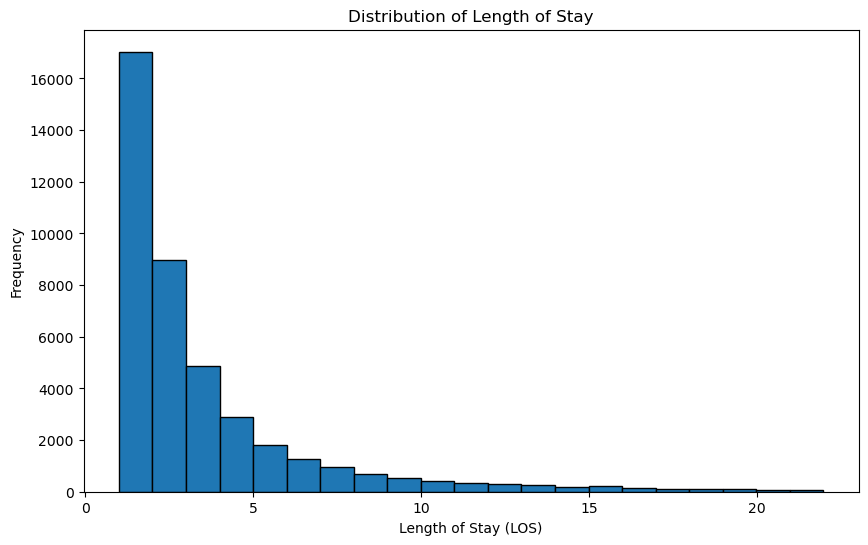

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df['los'], bins=21, edgecolor='black')
plt.xlabel('Length of Stay (LOS)')
plt.ylabel('Frequency')
plt.title('Distribution of Length of Stay')
plt.show()

In [6]:
df['los'].describe()

count    41413.000000
mean         3.530498
std          3.322124
min          1.000000
25%          1.538576
50%          2.283160
75%          4.039097
max         21.987106
Name: los, dtype: float64

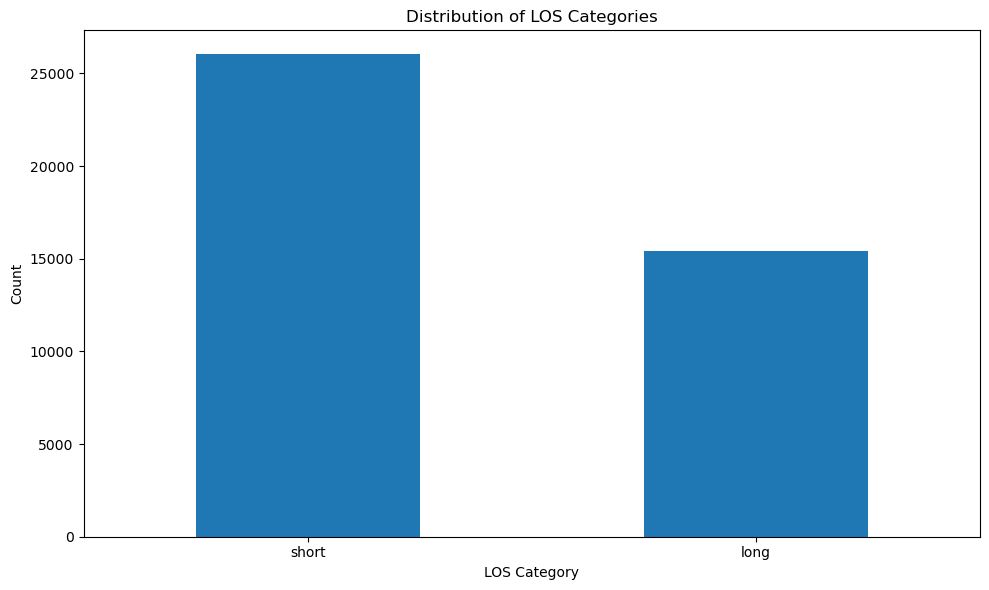

In [18]:
plt.figure(figsize=(10, 6))
df['los_category'].value_counts().plot(kind='bar')
plt.xlabel('LOS Category')
plt.ylabel('Count')
plt.title('Distribution of LOS Categories')
plt.xticks(rotation=360)  
plt.tight_layout()  
plt.show()

## 2. Race

White                     31310
Black/African American     4896
Other                      2108
Hispanic/Latino            1728
Asian                      1371
dtype: int64


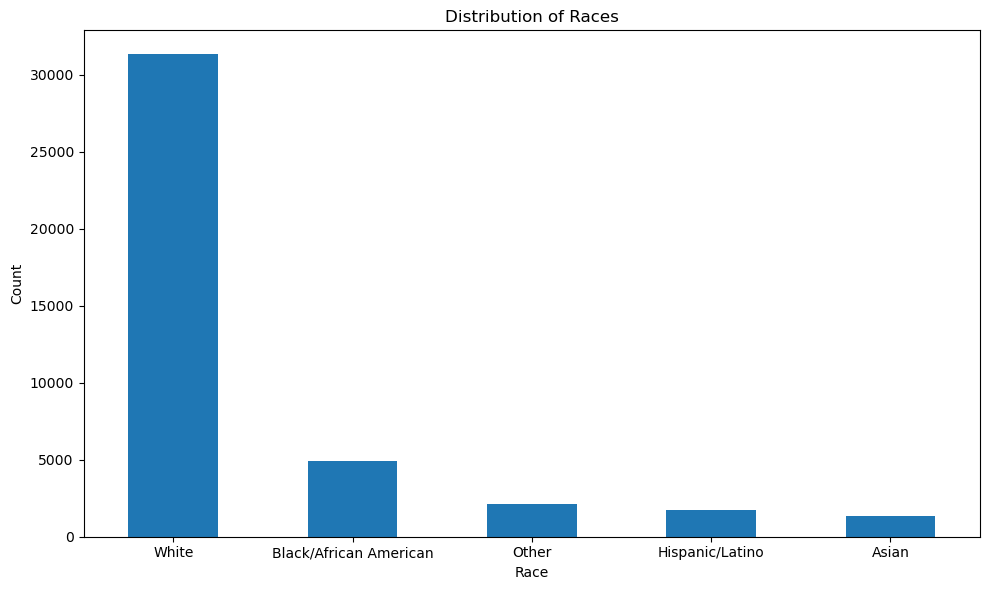

In [28]:
plt.figure(figsize=(10, 6))

race_columns = ['RACE_Asian', 'RACE_Black/African American', 'RACE_Hispanic/Latino', 'RACE_Other', 'RACE_White']
race_counts = df[race_columns].sum()

# Sorted in descending order for nicer plot
sorted = race_counts.sort_values(ascending=False)
sorted.index = sorted.index.str.replace('RACE_', '')

print(sorted)

sorted.plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Races')
plt.xticks(rotation=360)  
plt.tight_layout()  
plt.show()

## 3. Gender

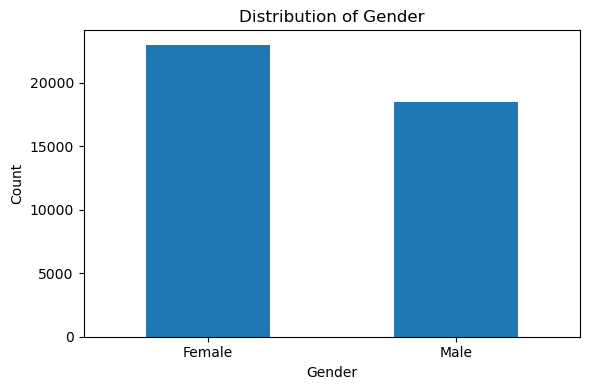

In [21]:
plt.figure(figsize=(6, 4))
gender_labels = {1: 'Female', 0: 'Male'}

gender_counts = df['gender'].map(gender_labels).value_counts()

gender_counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.xticks(rotation=0) 
plt.tight_layout()  
plt.show()


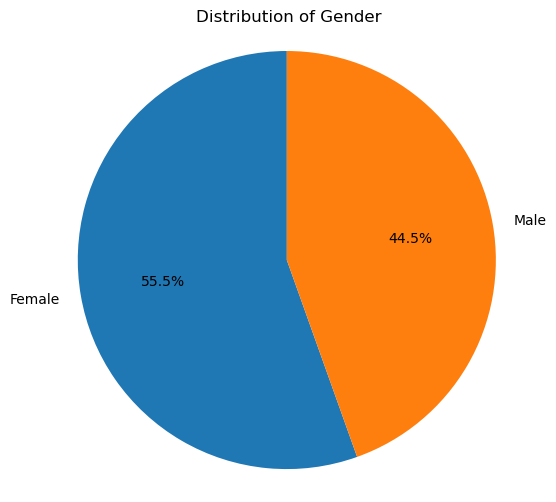

In [16]:
gender_labels = {1: 'Female', 0: 'Male'}

gender_counts = df['gender'].map(gender_labels).value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',  startangle=90)
plt.title('Distribution of Gender')
plt.axis('equal')  
plt.show()

## 4. Insurance

INS_Medicaid     2941
INS_Medicare    19230
INS_Other       19242
dtype: int64


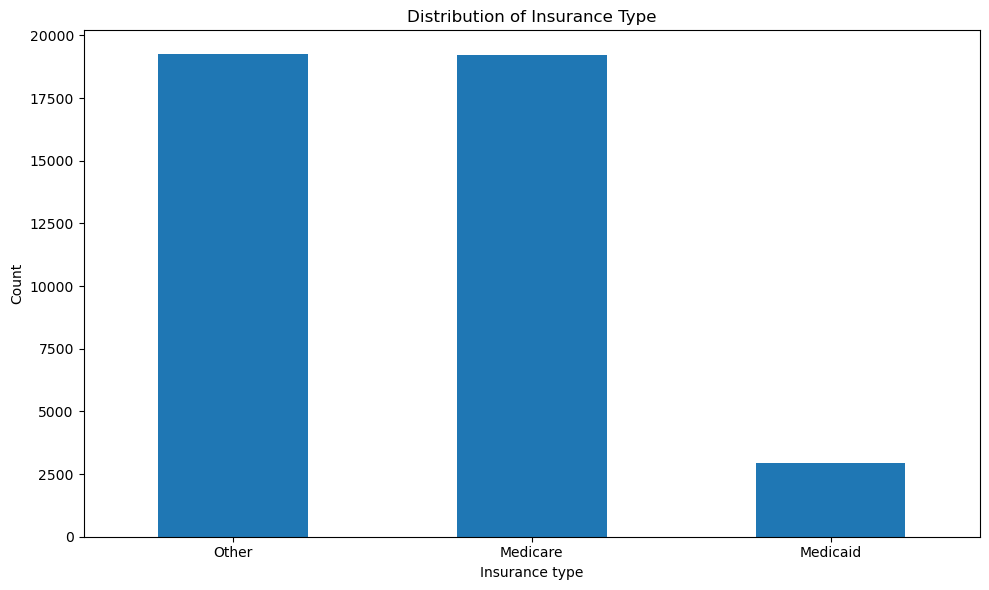

In [29]:
plt.figure(figsize=(10, 6))

race_columns = ['INS_Medicaid','INS_Medicare', 'INS_Other']
race_counts = df[race_columns].sum()

# Sorted in descending order for nicer plot
sorted = race_counts.sort_values(ascending=False)
sorted.index = sorted.index.str.replace('INS_', '')

print(race_counts)

sorted.plot(kind='bar')
plt.xlabel('Insurance type')
plt.ylabel('Count')
plt.title('Distribution of Insurance Type')
plt.xticks(rotation=360)  
plt.tight_layout()  
plt.show()

## 5. Age

age_18-24      846
age_25-44     4457
age_45-64    14821
age_65-88    19465
age_89+       1824
dtype: int64


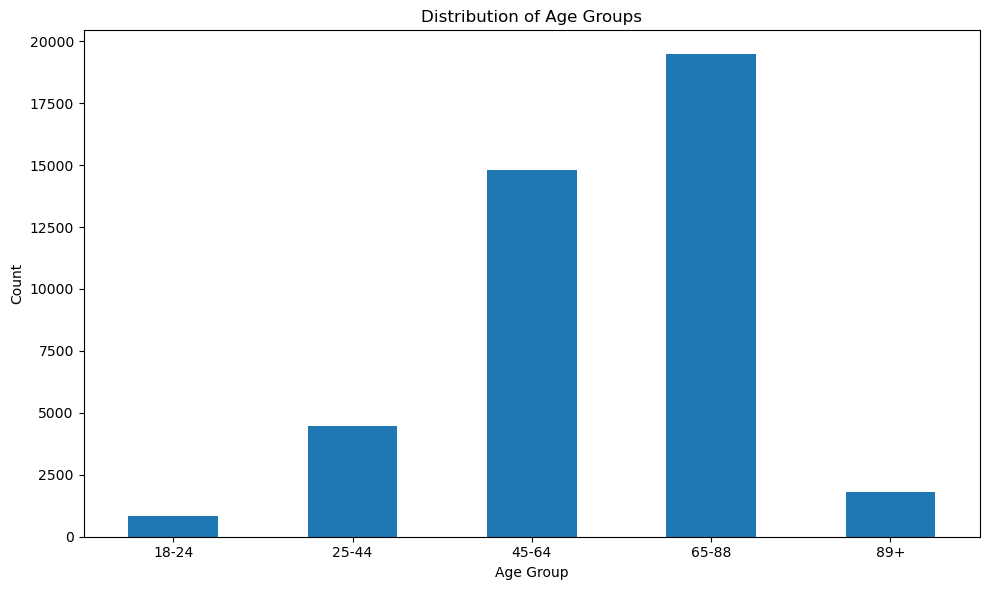

In [30]:
age_labels = ['18-24', '25-44', '45-64', '65-88', '89+']
age_counts = df[['age_18-24', 'age_25-44', 'age_45-64', 'age_65-88', 'age_89+']].sum()
print(age_counts)

plt.figure(figsize=(10, 6))
ax = age_counts.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')
plt.xticks(range(len(age_labels)), age_labels, rotation=0)  
plt.tight_layout()  
plt.show()


# final: combined plot

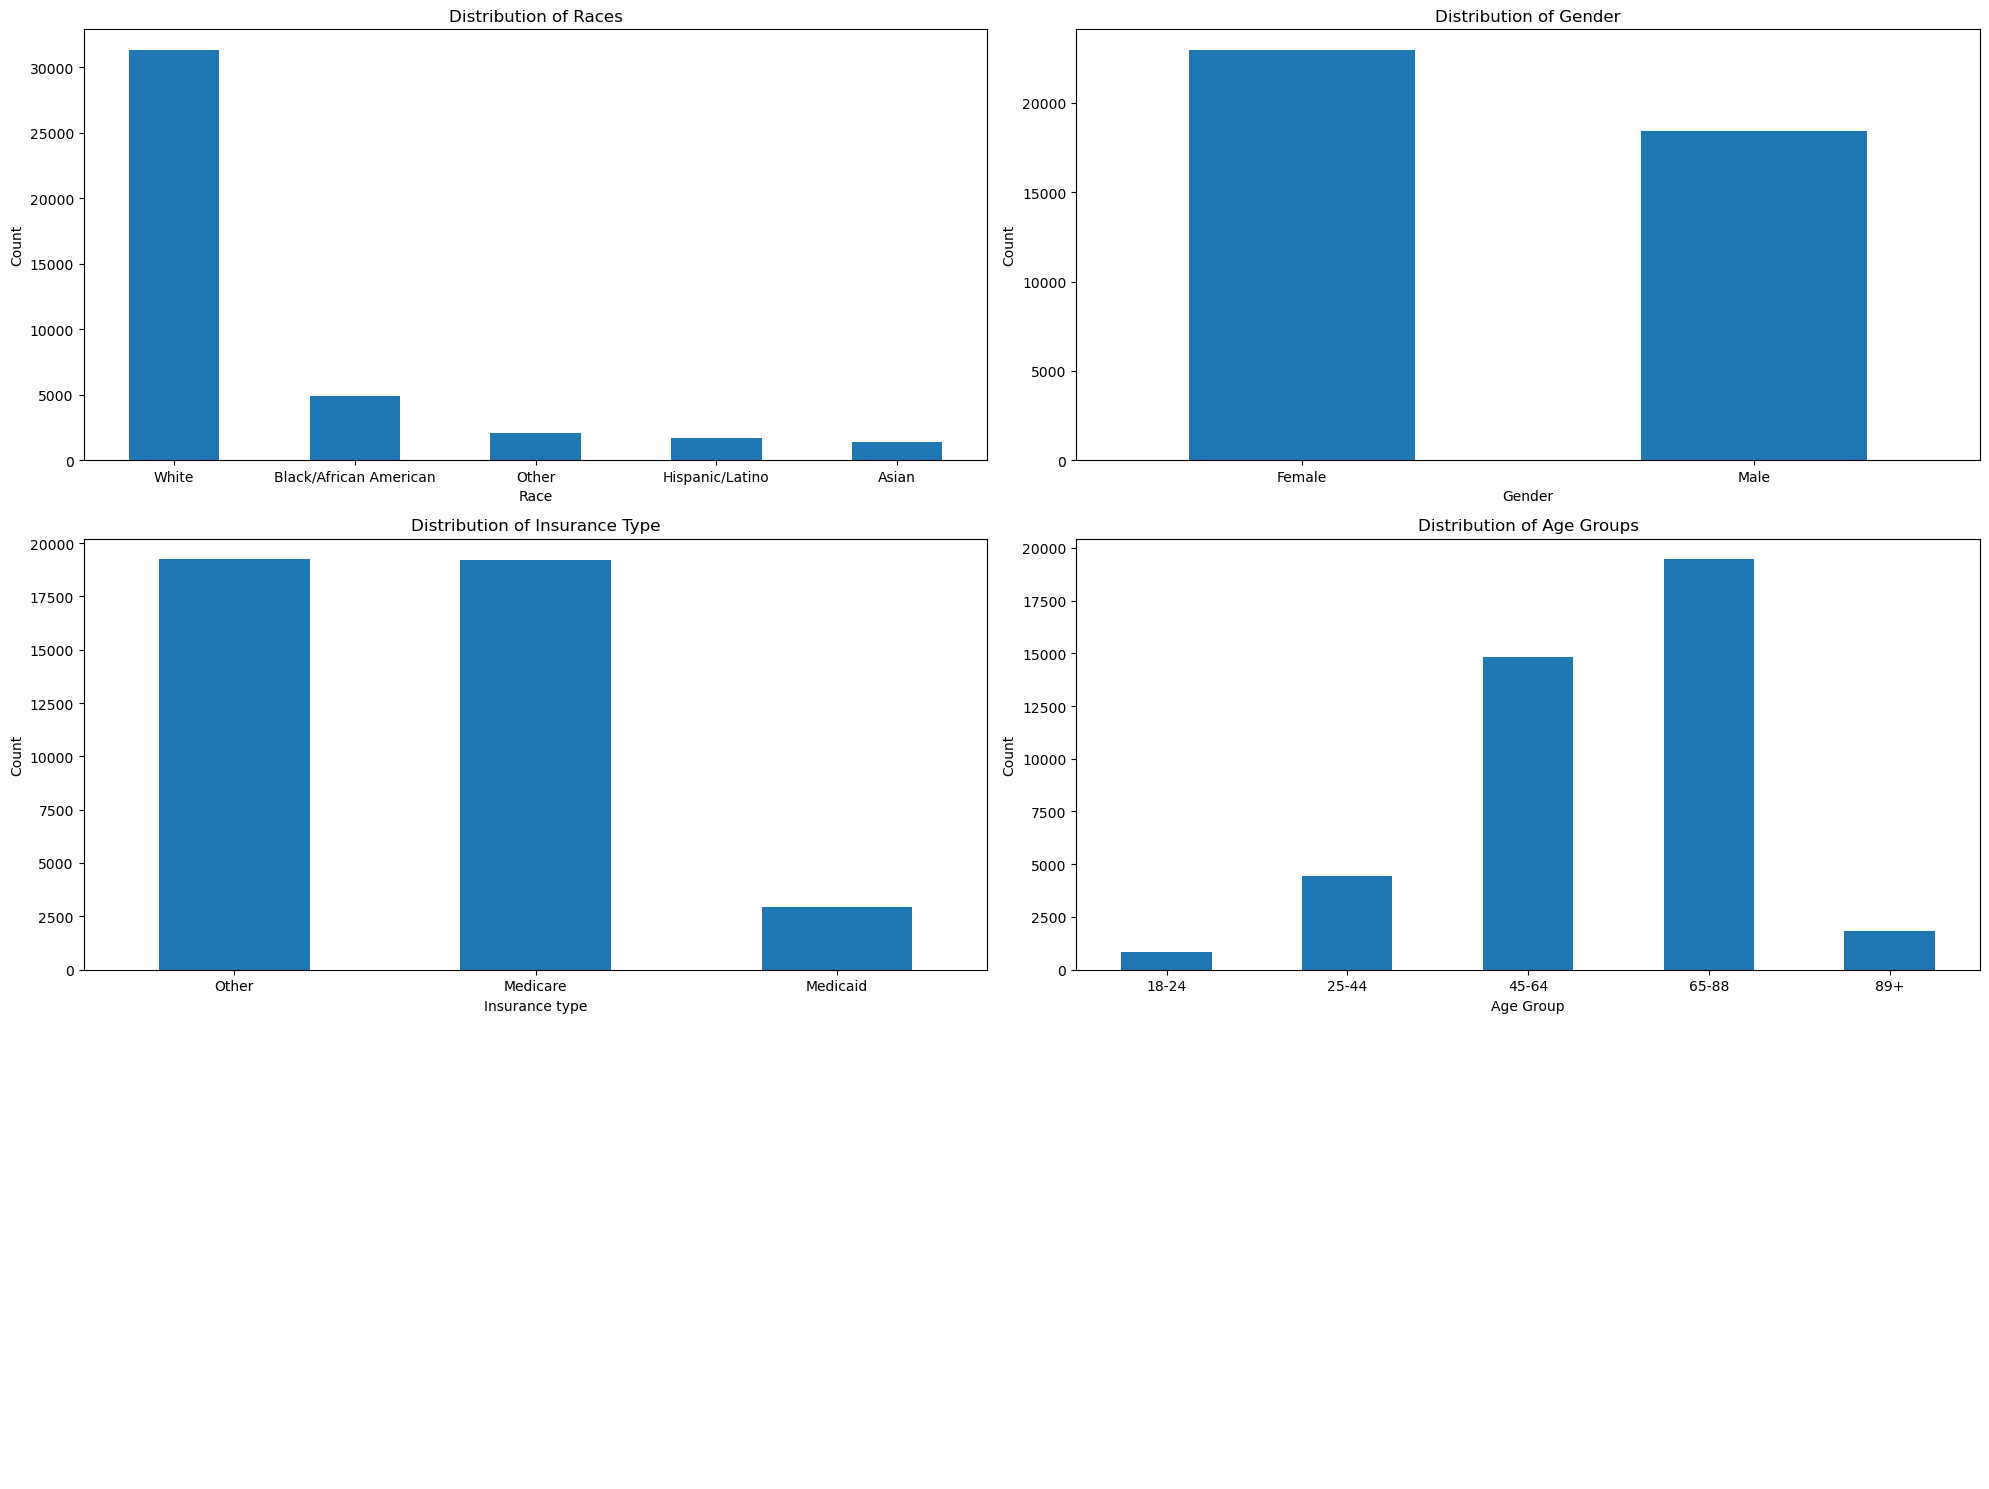

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

# Distribution of Races
race_columns = ['RACE_Asian', 'RACE_Black/African American', 'RACE_Hispanic/Latino', 'RACE_Other', 'RACE_White']
race_counts = df[race_columns].sum()
race_counts_sorted = race_counts.sort_values(ascending=False)
race_counts_sorted.index = race_counts_sorted.index.str.replace('RACE_', '')
race_counts_sorted.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_xlabel('Race')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Distribution of Races')
axes[0, 0].set_xticks(range(len(race_counts_sorted.index)))
axes[0, 0].set_xticklabels(race_counts_sorted.index, rotation=360)

# Distribution of Gender
gender_labels = {1: 'Female', 0: 'Male'}
gender_counts = df['gender'].map(gender_labels).value_counts()
gender_counts.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Distribution of Gender')
axes[0, 1].set_xticks(range(len(gender_counts.index)))
axes[0, 1].set_xticklabels(gender_counts.index, rotation=0)

# Distribution of Insurance Type
insurance_columns = ['INS_Medicaid', 'INS_Medicare', 'INS_Other']
insurance_counts = df[insurance_columns].sum()
insurance_counts_sorted = insurance_counts.sort_values(ascending=False)
insurance_counts_sorted.index = insurance_counts_sorted.index.str.replace('INS_', '')
insurance_counts_sorted.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_xlabel('Insurance type')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Distribution of Insurance Type')
axes[1, 0].set_xticks(range(len(insurance_counts_sorted.index)))
axes[1, 0].set_xticklabels(insurance_counts_sorted.index, rotation=360)

# Distribution of Age Groups
age_columns = ['age_18-24', 'age_25-44', 'age_45-64', 'age_65-88', 'age_89+']
age_counts = df[age_columns].sum()
age_labels = ['18-24', '25-44', '45-64', '65-88', '89+']
age_counts.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Distribution of Age Groups')
axes[1, 1].set_xticks(range(len(age_labels)))
axes[1, 1].set_xticklabels(age_labels, rotation=0)

axes[2, 0].axis('off')
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


In [7]:
# Calculate percentages

race_columns = ['RACE_Asian', 'RACE_Black/African American', 'RACE_Hispanic/Latino', 'RACE_Other', 'RACE_White']
race_counts = df[race_columns].sum()
totalNumRace = race_counts.sum()
race_percentages = (race_counts / totalNumRace) * 100

print("Race Distribution (%):")
for race, percentage in race_percentages.items():
    race_name = race.replace('RACE_', '')
    print(f"{race_name}: {percentage:.1f}%")




gender_labels = {1: 'Female', 0: 'Male'}
gender_counts = df['gender'].map(gender_labels).value_counts()
totalNumGender = gender_counts.sum()
gender_percentages = (gender_counts / totalNumGender) * 100

print("\nGender Distribution (%):")
for gender, percentage in gender_percentages.items():
    print(f"{gender}: {percentage:.1f}%")




insurance_columns = ['INS_Medicaid', 'INS_Medicare', 'INS_Other']
insurance_counts = df[insurance_columns].sum()
totalNumIns = insurance_counts.sum()
insurance_percentages = (insurance_counts / totalNumIns) * 100

print("\nInsurance Type Distribution (%):")
for insurance, percentage in insurance_percentages.items():
    insurance_name = insurance.replace('INS_', '')
    print(f"{insurance_name}: {percentage:.1f}%")




age_columns = ['age_18-24', 'age_25-44', 'age_45-64', 'age_65-88', 'age_89+']
age_counts = df[age_columns].sum()
totalNumAge = age_counts.sum()
age_percentages = (age_counts / totalNumAge) * 100
age_labels = ['18-24', '25-44', '45-64', '65-88', '89+']

print("\nAge Group Distribution (%):")
for age, percentage in zip(age_labels, age_percentages):
    print(f"{age}: {percentage:.1f}%")


Race Distribution (%):
Asian: 3.3%
Black/African American: 11.8%
Hispanic/Latino: 4.2%
Other: 5.1%
White: 75.6%

Gender Distribution (%):
Female: 55.5%
Male: 44.5%

Insurance Type Distribution (%):
Medicaid: 7.1%
Medicare: 46.4%
Other: 46.5%

Age Group Distribution (%):
18-24: 2.0%
25-44: 10.8%
45-64: 35.8%
65-88: 47.0%
89+: 4.4%


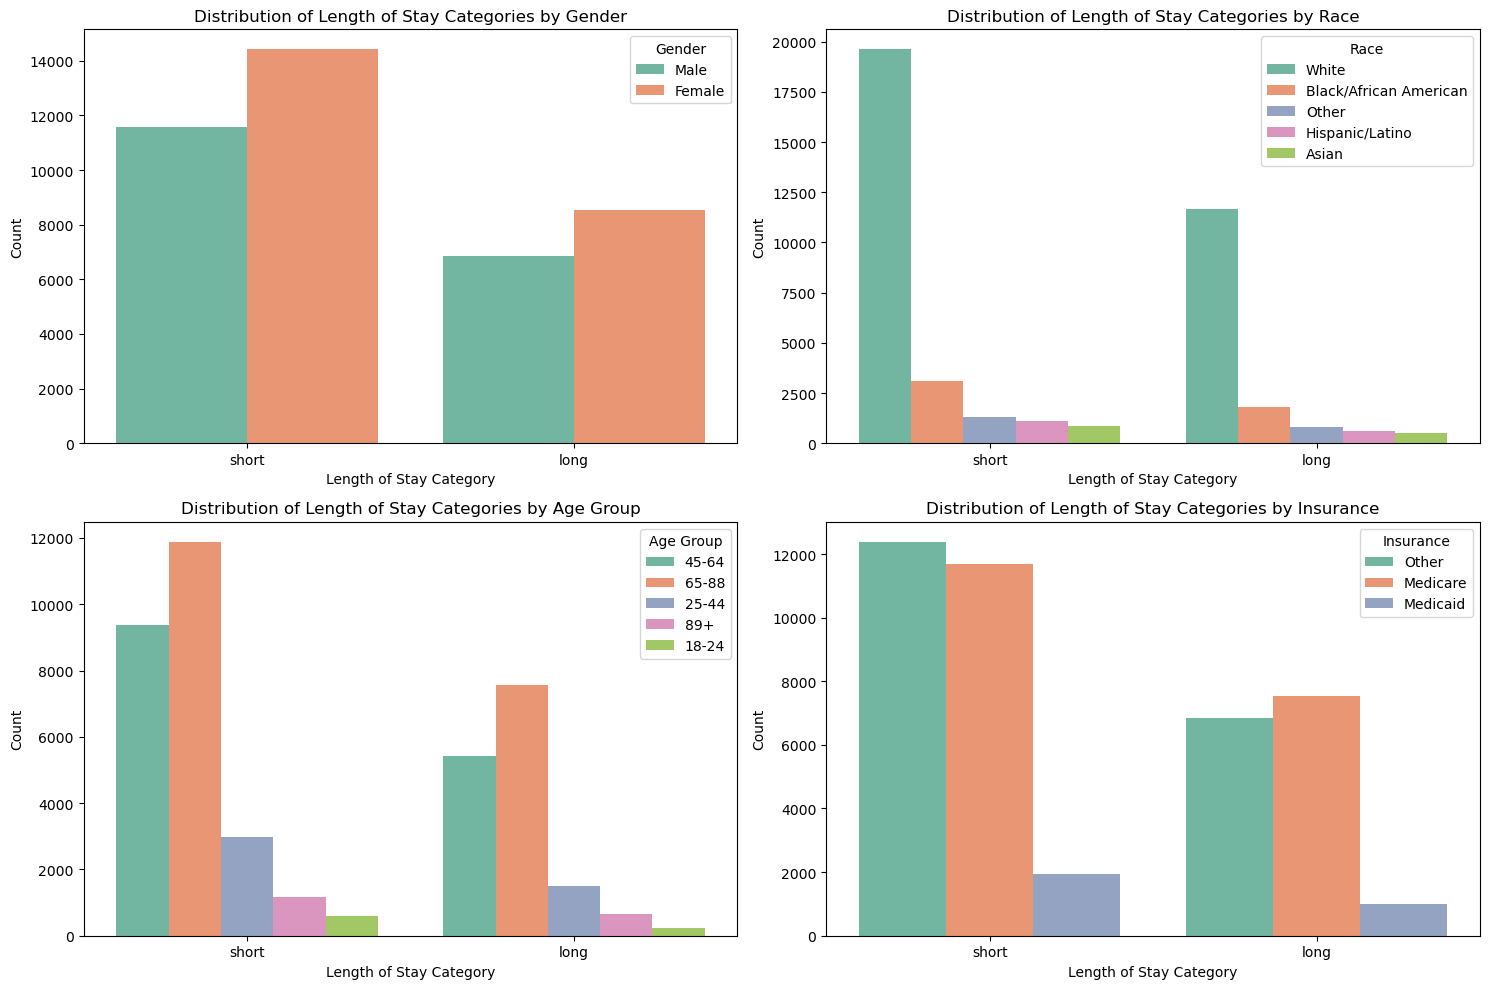

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

#Gender
sns.countplot(data=df, x='los_category', hue='gender', palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Length of Stay Categories by Gender')
axes[0, 0].set_xlabel('Length of Stay Category')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Gender', labels=['Male', 'Female'])

#Race
race_columns = ['RACE_Asian', 'RACE_Black/African American', 'RACE_Hispanic/Latino', 'RACE_Other', 'RACE_White']
df['race'] = df[race_columns].idxmax(axis=1).apply(lambda x: x.split('_')[1])
sns.countplot(data=df, x='los_category', hue='race', palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Length of Stay Categories by Race')
axes[0, 1].set_xlabel('Length of Stay Category')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Race')

#Age
age_columns = ['age_18-24', 'age_25-44', 'age_45-64', 'age_65-88', 'age_89+']
df['age_group'] = df[age_columns].idxmax(axis=1).apply(lambda x: x.split('_')[1])
sns.countplot(data=df, x='los_category', hue='age_group', palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Length of Stay Categories by Age Group')
axes[1, 0].set_xlabel('Length of Stay Category')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Age Group')

#Insurance
insurance_columns = ['INS_Medicaid', 'INS_Medicare', 'INS_Other']
df['insurance'] = df[insurance_columns].idxmax(axis=1).apply(lambda x: x.split('_')[1])
sns.countplot(data=df, x='los_category', hue='insurance', palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Length of Stay Categories by Insurance')
axes[1, 1].set_xlabel('Length of Stay Category')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Insurance')

plt.tight_layout()
plt.show()
